In [3]:
import pyclesperanto_prototype as cle
import numpy as np

cle.select_device('RTX')

<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

(3, 360)


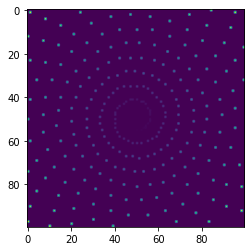

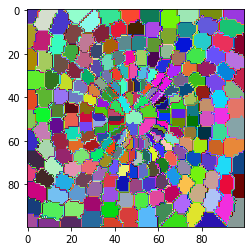

In [27]:
width = 100
height = 100

angle_step = 11

points = []

for i in range(0, 360):
    if i == 0:
        radius = 0
    else:
        radius = i * 0.2 + 5
    angle = i * angle_step / 180 * np.pi
    
    x = width / 2 + np.sin(angle) * radius
    y = height / 2 + np.cos(angle) * radius
    
    points.append([x, y, i + 1])

pointvaluelist = cle.push(np.asarray(points))

print(pointvaluelist.shape)
    
image = cle.create([width, height])
cle.set(image, 0)

cle.write_values_to_positions(pointvaluelist, image)

cle.imshow(image)

labels = cle.voronoi_labeling(image)
cle.imshow(labels, labels=True)
    

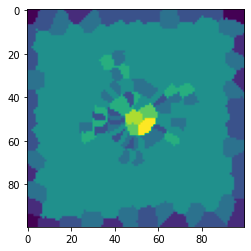

In [28]:
neighbor_count_map = cle.touching_neighbor_count_map(labels)
cle.imshow(neighbor_count_map)

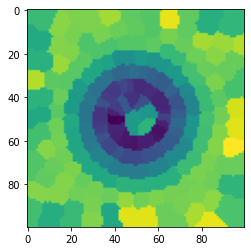

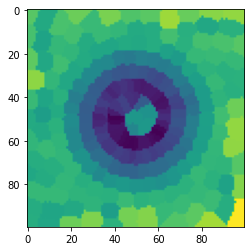

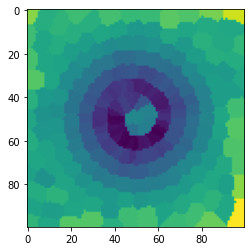

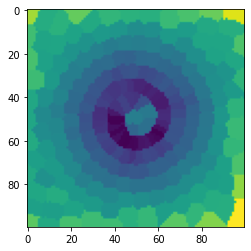

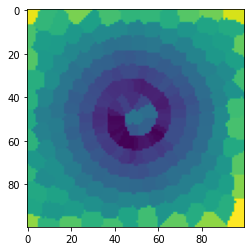

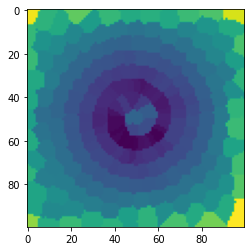

In [29]:
for n in range(1,7):
    distance_map = cle.average_distance_of_n_closest_neighbors_map(labels, n=n)
    cle.imshow(distance_map)